In [1]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


# Basic Template
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext nb_black
import matplotlib.pyplot as plt
import numpy as np

import ncxt_sxtcnn
from ncxt_sxtcnn.pipe import NCXTPipe
from pathlib import Path
import ncxtutils
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderOrganelle

import ncxtamira



<IPython.core.display.Javascript object>

In [2]:
import logging

_ = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.INFO)

<IPython.core.display.Javascript object>

Files 15 + 0


INFO     [sxtcnn.py:415] Setting device to cuda:1
INFO     [sxtcnn.py:437] Initializing data: c:\Users\Axel Ekman\Documents\2025\cnn\data49538
INFO     [sxtcnn.py:438] Training: [4, 1, 13, 0, 14, 9, 8, 12, 11, 5]
INFO     [sxtcnn.py:439] Validation: [ 3  7  6  2 10]


torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])
segmentation
(5, 96, 96, 96)
(96, 96, 96)
torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])
segmentation
(5, 96, 96, 96)
(96, 96, 96)


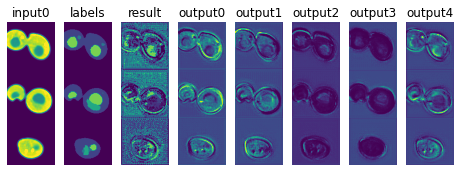

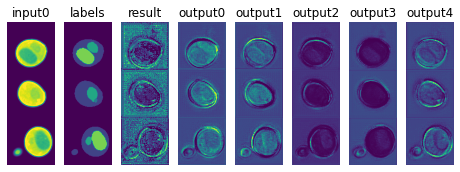

<IPython.core.display.Javascript object>

In [3]:
base = Path("z:/Axel/2025/Marshall/")
organelles = ["cell", "lipid", "nucleus", "vacuole"]
wd = "c:/Users/Axel Ekman/Documents/2025/cnn/"
disjoint_folder = base / "disjoint_original"
model_args = {"instancenorm": True, "depth": 5, "start_filts": 64}
loader_args = {"working_directory": Path(wd) / "test"}
processor_args = {"block_shape": [96, 96, 96], "binning": 2, "n_blocks": 2}
settings = {
    "maximum_iterations": 1000,
    "max_batch_size": 2,
    "augment_elastic": 5,
    "augment_linear": 0.5,
}

pipe = NCXTPipe(
    folder=disjoint_folder,
    working_directory=wd,
    organelles=organelles,
    fold=3,
    criterion=CrossEntropyLoss_DiceLoss,
    processor_args=processor_args,
    model_args=model_args,
    loader_args=loader_args,
    settings=settings,
)
pipe.init_fold(0)
pipe.sxtcnn.show_training_data(mode="train")
pipe.sxtcnn.show_training_data(mode="validation")

In [4]:
pipe.sxtcnn.run(n_epoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]

INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memory_avail 30294
INFO     [sxtcnn.py:953] Increasing batch to 2
INFO     [sxtcnn.py:951] model_size 9144.7529296875 memo

<IPython.core.display.Javascript object>

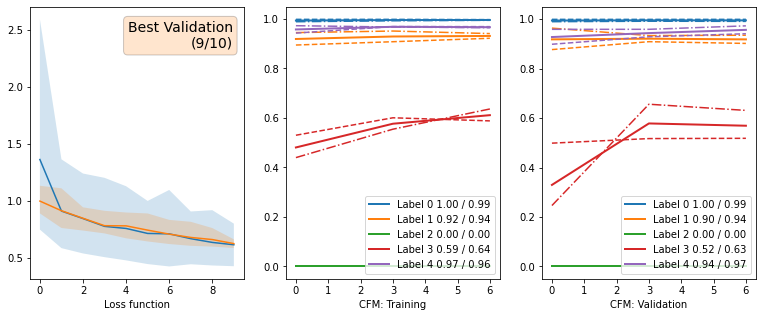

<IPython.core.display.Javascript object>

In [5]:
pipe.sxtcnn.logger.plot()

torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])
segmentation
(5, 96, 96, 96)
(96, 96, 96)


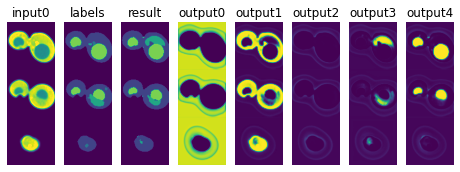

<IPython.core.display.Javascript object>

In [8]:
pipe.sxtcnn.show_training_data(mode="train")

torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])
segmentation
(5, 96, 96, 96)
(96, 96, 96)


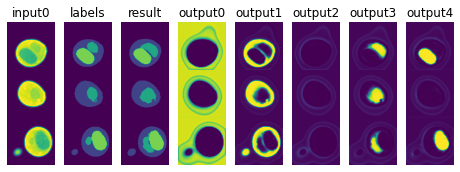

<IPython.core.display.Javascript object>

In [9]:
pipe.sxtcnn.show_training_data(mode="validation")

In [5]:
from ncxt_sxtcnn.sxtcnn.sxtcnn import TrainBlocks
import torch

self = pipe.sxtcnn
index = 0
mode = "train"

folder = self._data_folder / mode
loader = TrainBlocks(folder, random_flip=False)

self.model.eval()
with torch.no_grad():
    inputs, labels = loader[index]
    print(inputs.shape, labels.shape)

    inputs = inputs.view(1, *inputs.shape).to(self.device)
    labels = labels.view(1, *labels.shape).to(self.device)
    output = self.model(inputs)

torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])


<IPython.core.display.Javascript object>

In [6]:
pipe.sxtcnn.criterion(output, labels)

tensor(1.8814, device='cuda:0')

<IPython.core.display.Javascript object>

In [7]:
pipe.sxtcnn.run(n_epoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]


 Step train
Data torch.Size([2, 1, 96, 96, 96]) torch.Size([2, 96, 96, 96])
torch.Size([2, 5, 96, 96, 96])
tensor(-2690203.5000, device='cuda:0', grad_fn=<SumBackward0>)
tensor(213116, device='cuda:0')


RuntimeError: CUDA error: device-side assert triggered

<IPython.core.display.Javascript object>

In [9]:
pipe.sxtcnn.criterion(output, labels)

torch.Size([1, 5, 96, 96, 96]) torch.Size([1, 96, 96, 96])


RuntimeError: CUDA error: device-side assert triggered

<IPython.core.display.Javascript object>

In [6]:
pipe.sxtcnn.device

'cuda:0'

<IPython.core.display.Javascript object>

torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])


RuntimeError: CUDA error: device-side assert triggered

<IPython.core.display.Javascript object>

In [15]:
pipe.sxtcnn.get_training_data(mode="train")

torch.Size([1, 96, 96, 96]) torch.Size([96, 96, 96])


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

<IPython.core.display.Javascript object>

In [6]:
pipe.sxtcnn.show_training_data(mode="train")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

<IPython.core.display.Javascript object>

In [5]:
pipe.sxtcnn.show_training_data(mode="validation")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

<IPython.core.display.Javascript object>

Found 4 data and 1 labels


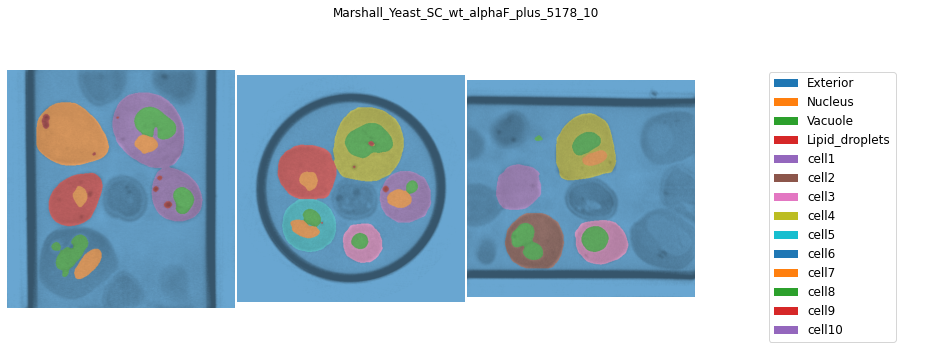

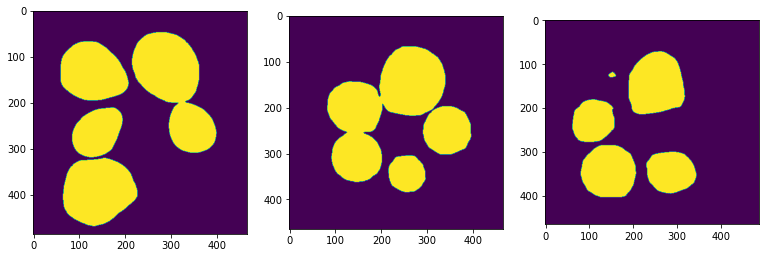

<IPython.core.display.Javascript object>

In [2]:
base = "c:/Users/axela/Documents/2022/autoseg/"
hx_files = [path for path in Path(base).rglob("*.hx")]
len(hx_files)

p = ncxtamira.AmiraCell.from_hx(hx_files[0])
p.preview()
ncxtutils.volshow(p.labels>0)


In [34]:
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderOrganelle
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.sxtcnn import SXTCNN
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss
import torch

working_directory = Path("c:/Users/axela/Documents/2022/cnn/wd/")
loader = AmiraLoaderOrganelle(
    hx_files, organelles=["cell"], sanitize=True, working_directory=working_directory
)
processor = RandomBlockProcessor(binning=8)
model = UNet3D(num_classes=2)
criterion = CrossEntropyLoss_DiceLoss()

seg = SXTCNN(
    loader, processor, model, criterion, working_directory, conf={'maximum_iterations':100}, device="gpu"
)
seg.init_data([0], [0])
seg.run(50)


  0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

segmentation
(2, 32, 32, 32)
(32, 32, 32)


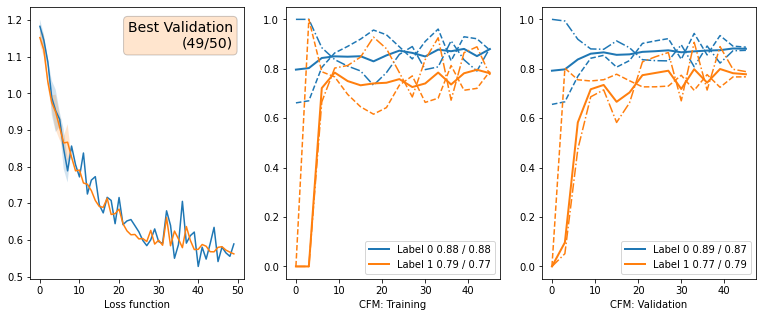

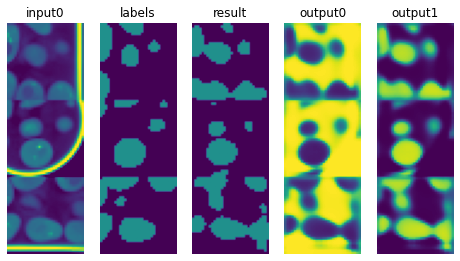

<IPython.core.display.Javascript object>

In [35]:
seg.logger.plot()
seg.show_training_data()

In [36]:
from ncxt_sxtcnn.sxtcnn.processors import RandomFloatBlockProcessor
from ncxt_sxtcnn.sxtcnn.loaders import AmiraSDFLoader
from ncxt_sxtcnn.sxtcnn.criteria import SingleMSELoss
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.sxtcnn import SXTCNN
import torch

working_directory = Path("c:/Users/axela/Documents/2022/cnn/wd/")
loader = AmiraSDFLoader(
    hx_files, organelles=["cell"], sanitize=True, working_directory=working_directory
)
processor = RandomFloatBlockProcessor(binning=8)
model = UNet3D(num_classes=1)
criterion = SingleMSELoss()

seg2 = SXTCNN(
    loader,
    processor,
    model,
    criterion,
    working_directory,
    conf={"maximum_iterations": 100},
    device="gpu",
)
seg2.init_data([0], [0])
seg2.run(50)

  0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

match
(1, 32, 32, 32)
(32, 32, 32)


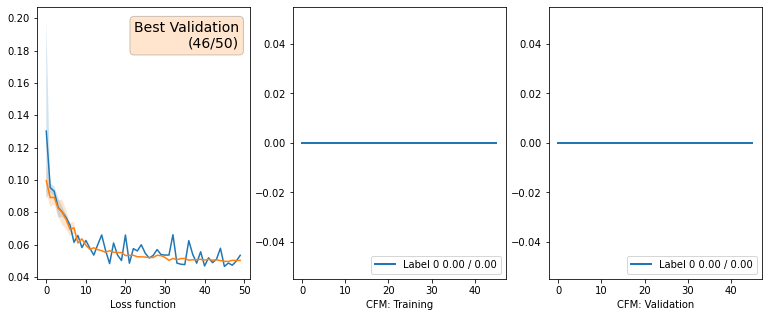

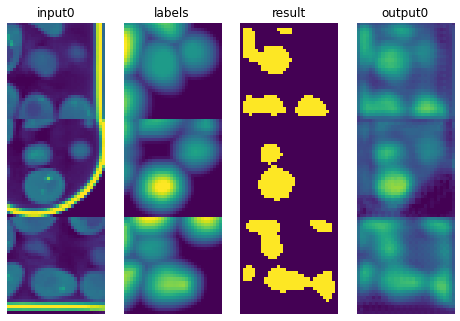

<IPython.core.display.Javascript object>

In [37]:
seg2.logger.plot()
seg2.show_training_data()

In [40]:
# model.summary((1, 32, 32, 32))

<IPython.core.display.Javascript object>

In [41]:
loader_float = torch.utils.data.DataLoader(t_float, batch_size=2)
model = UNet3D(num_classes=1)


torch.Size([2, 1, 32, 32, 32])
torch.Size([2, 32, 32, 32])
torch.Size([2, 1, 32, 32, 32])


<IPython.core.display.Javascript object>

In [55]:
torch.nn.MSELoss()(model_out, labels[:, None, :, :, :])

tensor(0.0875, grad_fn=<MseLossBackward0>)

<IPython.core.display.Javascript object>

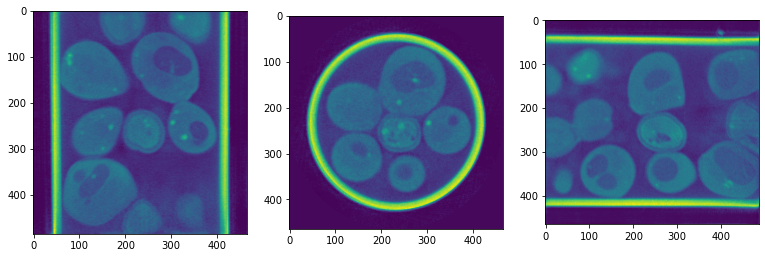

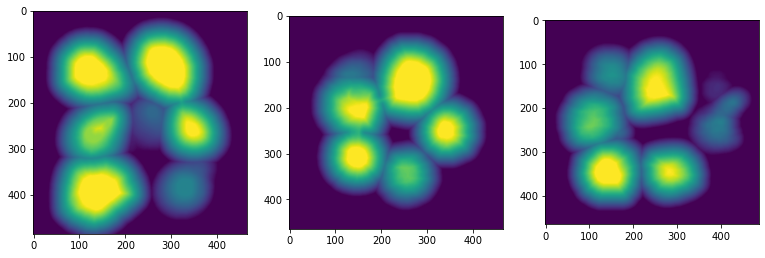

<IPython.core.display.Javascript object>

In [248]:
item = loader[0]
ncxtutils.volshow(item["input"][0])
ncxtutils.volshow(item["target"])

In [249]:
processor.setloader(loader)
blocks = processor[0]

<IPython.core.display.Javascript object>

(1, 32, 32, 32)
(32, 32, 32)


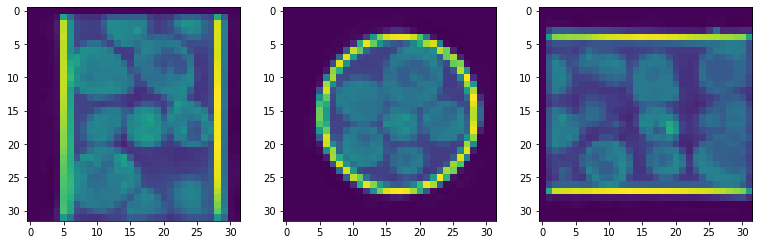

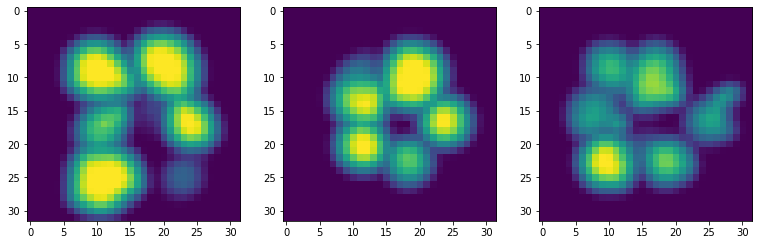

<IPython.core.display.Javascript object>

In [250]:
print(blocks[0][0].shape)
print(blocks[1][0].shape)

ncxtutils.volshow(blocks[0][0][0])
ncxtutils.volshow(blocks[1][0])

  0%|          | 0/5 [00:00<?, ?it/s]

PicklingError: Can't pickle <class 'ncxt_sxtcnn.sxtcnn.datasets.TrainBlocks'>: it's not the same object as ncxt_sxtcnn.sxtcnn.datasets.TrainBlocks

<IPython.core.display.Javascript object>

In [203]:
def mask2sdf(mask, spread=32):
    edt_bg = np.clip(ndi.distance_transform_edt(np.bitwise_not(mask))-0.5, 0,np.infty)
    edt_fg = np.clip(ndi.distance_transform_edt(mask)-0.5, 0,np.infty)        
    edt_bg_norm = np.clip(edt_bg / spread, 0, 1)
    edt_fg_norm = np.clip(edt_fg / spread, 0, 1)
    return (1 + edt_fg_norm - edt_bg_norm) / 2


<IPython.core.display.Javascript object>

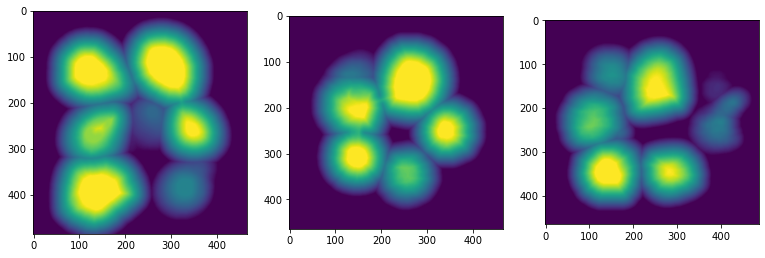

<IPython.core.display.Javascript object>

In [204]:
from ncxt_sxtcnn.loaders import 

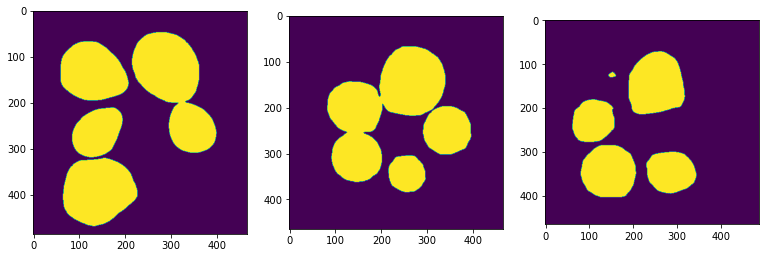

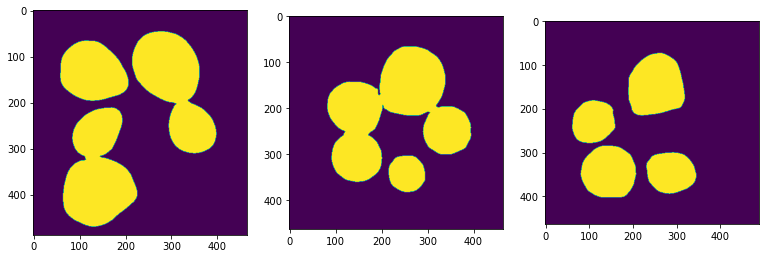

<IPython.core.display.Javascript object>

In [205]:
fb_sdf = ndi.zoom(ndi.zoom(sdf_32, 1 / scale, order=1), scale, order=1)
ncxtutils.volshow(mask)
ncxtutils.volshow(fb_sdf > 0.5)

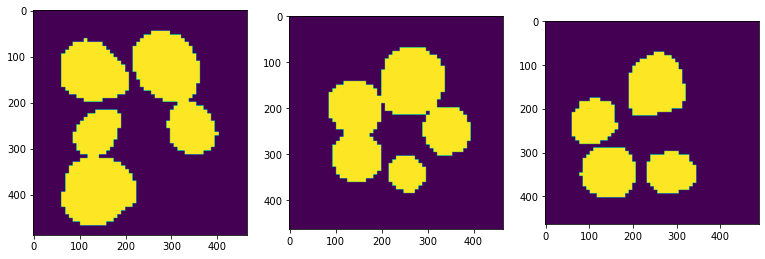

<IPython.core.display.Javascript object>

In [208]:
fb_mask = ndi.zoom(ndi.zoom(mask, 1 / scale, order=0), scale, order=0)
ncxtutils.volshow(fb_mask)

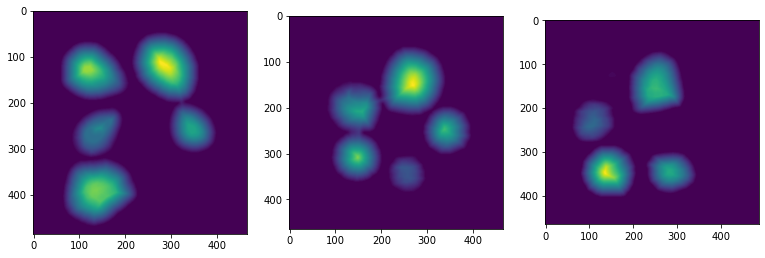

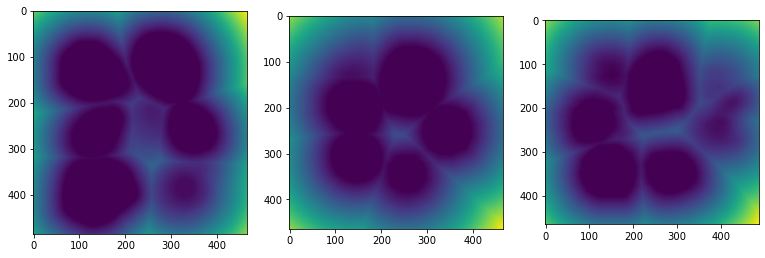

<IPython.core.display.Javascript object>

In [149]:
edt_fg = ndi.distance_transform_edt(mask)
edt_bg = ndi.distance_transform_edt(np.bitwise_not(mask))

ncxtutils.volshow(edt_fg)
ncxtutils.volshow(edt_bg)

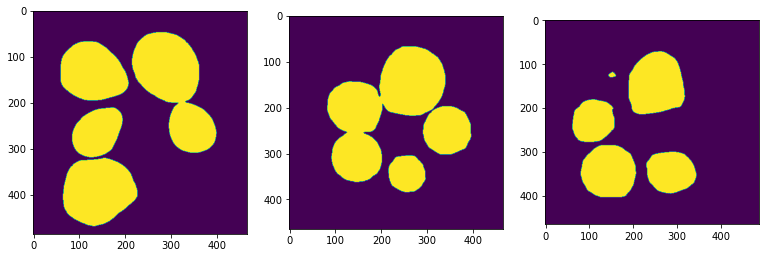

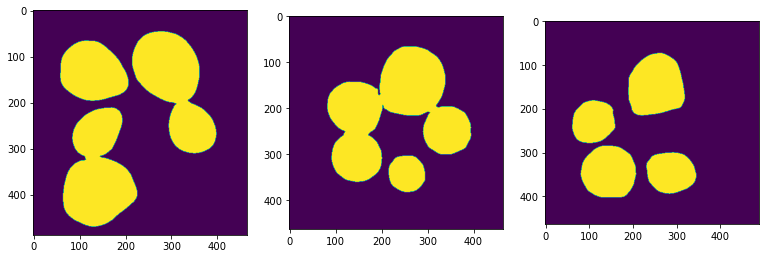

<IPython.core.display.Javascript object>

In [136]:
slices

(slice(4, 464, None), slice(0, 485, None), slice(0, 461, None))

<IPython.core.display.Javascript object>

  0%|          | 0/15 [00:00<?, ?it/s]

proc cell1 4
10249495.0
proc cell2 5
32177534.0
proc cell3 6
44445444.0
proc cell4 7
76943230.0
proc cell5 8
89913310.0
proc cell6 9
126421070.0
proc cell7 10
149935140.0
proc cell8 11
167905860.0
proc cell9 12
185457600.0
proc cell10 13
215395400.0
proc cell11 14
235150530.0


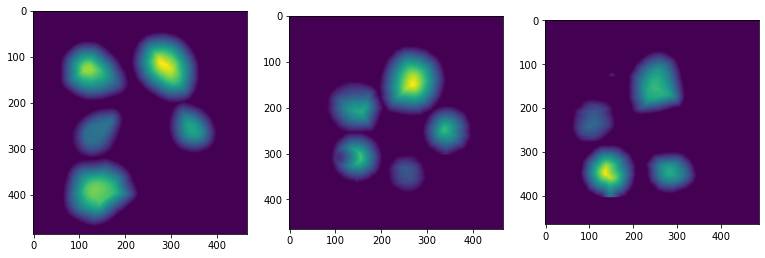

<IPython.core.display.Javascript object>

In [138]:
from scipy import ndimage as ndi
from tqdm.auto import tqdm
from ncxtutils.utils import getCropLim

def getCropSlices(image, pad=8, th=0.01):

    num_el_0 = ndi.filters.maximum_filter(np.sum(np.sum(image, 1), 1), 2 * pad + 1)
    num_el_1 = ndi.filters.maximum_filter(np.sum(np.sum(image, 0), 1), 2 * pad + 1)
    num_el_2 = ndi.filters.maximum_filter(np.sum(np.sum(image, 0), 0), 2 * pad + 1)

    prof_list = [num_el_0, num_el_1, num_el_2]
    count_lim = [th * np.max(x) for x in prof_list]

    clims = tuple(
        slice(np.min(np.where(p > c)), np.max(np.where(p > c)))
        for p, c in zip(prof_list, count_lim)
    )

    return clims

def hx2sdf(cell):
    edt = 0.0 * cell.lac

    for k, v in tqdm(cell.key.items()):
        if "cell" in k:
            print("proc", k, v)
            mask = cell.labels == v
            slices = getCropSlices(mask, pad=1)

            mask_roi = mask[slices]
            edt_roi = edt[slices]

            edt[slices] = np.maximum(
                edt_roi, ndi.distance_transform_edt(ndi.binary_fill_holes(mask_roi))
            )

            print(np.sum(edt))
    ncxtutils.volshow(edt)


hx2sdf(p)

Found 6 data and 2 labels


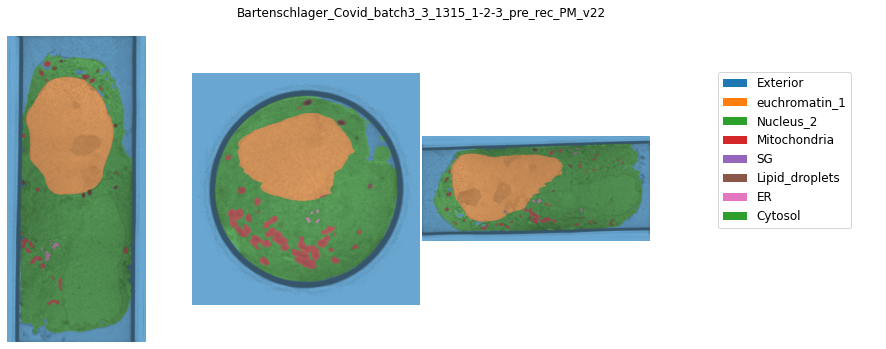

<IPython.core.display.Javascript object>

In [2]:
base = Path("C:/Users/axela/Documents/2021/covid/")
hx_files = [path for path in Path(base).rglob("*.hx")]
len(hx_files)

ncxtamira.AmiraCell.from_hx(hx_files[0]).preview()

Found 6 data and 2 labels


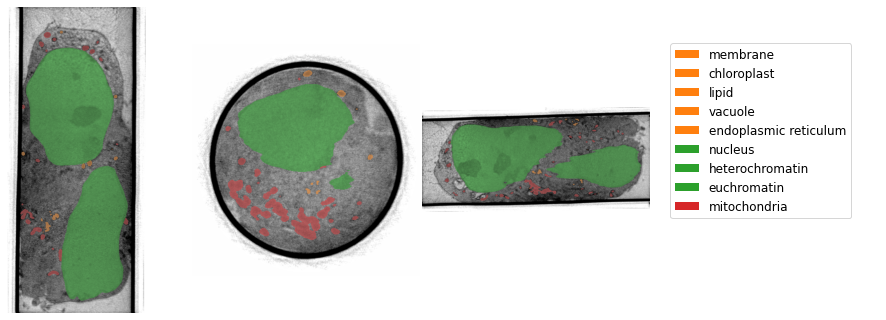

<IPython.core.display.Javascript object>

In [3]:
loader = AmiraLoaderOrganelle(
    hx_files, organelles=["cell", "nucleus", "mitochondria"], sanitize=True
)

item = loader._load_item(0)
cell = ncxtamira.AmiraCell(item["input"][0], item["target"], item["key"])
cell.preview()

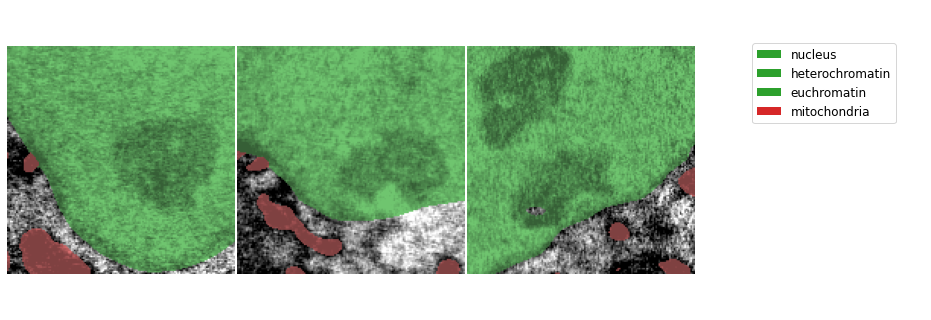

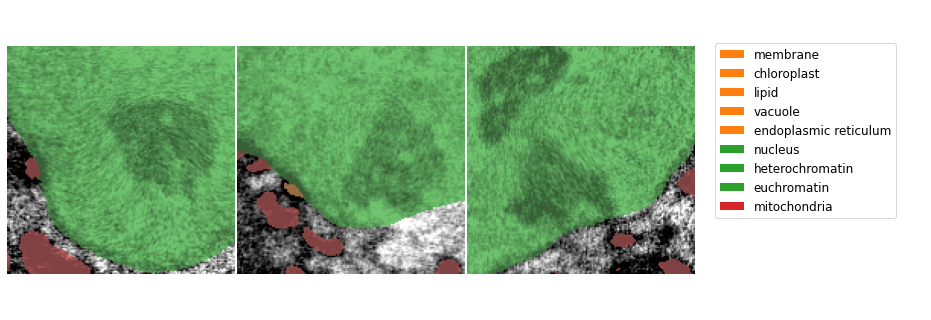

<IPython.core.display.Javascript object>

In [4]:
item_roi = {
    "input": item["input"][:, 250:400, 350:500, 150:300],
    "target": item["target"][250:400, 350:500, 150:300],
    "key": item["key"],
}

from ncxt_sxtcnn.sxtcnn.augment import ElasticDeformation

eld = ElasticDeformation(sigma=10)
x_out = eld.deform(item_roi["input"], order=3)
y_out = eld.deform(item_roi["target"], order=0)

cell = ncxtamira.AmiraCell(item_roi["input"][0], item_roi["target"], item_roi["key"])
cell.preview()

cell = ncxtamira.AmiraCell(x_out[0], y_out, item["key"])
cell.preview()

In [6]:
import torch
from torch.autograd import Variable
from ncxt_sxtcnn.sxtcnn.models import UNet3D



<IPython.core.display.Javascript object>

In [7]:
print(item_roi["key"])
print(np.unique(item_roi["target"]))

{'void': 0, 'membrane': 1, 'chloroplast': 1, 'lipid': 1, 'vacuole': 1, 'endoplasmic reticulum': 1, 'nucleus': 2, 'heterochromatin': 2, 'euchromatin': 2, 'mitochondria': 3}
[0 1 2 3]


<IPython.core.display.Javascript object>

In [29]:
def nplabel2onehot(x, channels = 4):
    target = torch.zeros((1, *x.shape)).long()
    target[0, :, :, :] = torch.IntTensor(x)
    
    retval = torch.zeros((1,channels, *x.shape)).long()
    _ = retval.scatter_(1, target.unsqueeze(1), 1)
    return retval
    
model_out = nplabel2onehot(item_roi["target"])
for i in range(4):
    npvol = model_out[0,i,:].detach().numpy()
    print(i, np.sum(npvol))
#     ncxtutils.volshow(item_roi["target"]==i)
#     ncxtutils.volshow(npvol)
    
print(np.bincount(item_roi["target"].ravel()))



0 980699
1 4605
2 2293603
3 96093
[ 980699    4605 2293603   96093]


<IPython.core.display.Javascript object>

In [30]:
from ncxt_sxtcnn.sxtcnn.criteria import (
    DiceLoss,
    CrossEntropyLoss,
    CrossEntropyLoss_DiceLoss,
)

<IPython.core.display.Javascript object>

In [31]:
y_out.shape

(150, 150, 150)

<IPython.core.display.Javascript object>

In [64]:
target = Variable(torch.IntTensor(np.random.random((1, *y_out.shape)))).long()
target[0, :, :, :] = torch.IntTensor(item_roi["target"])

print(inp.shape)
print(target.shape)


celoss = CrossEntropyLoss()
diceloss = DiceLoss()

print("oracle")
inp = 10 * nplabel2onehot(item_roi["target"]).float()
print(celoss(inp, target).item())
print(diceloss(inp, target).item())
print("elastic")

inp = 10 * nplabel2onehot(y_out).float()
print(celoss(inp, target).item())
print(diceloss(inp, target).item())

torch.Size([1, 4, 150, 150, 150])
torch.Size([1, 150, 150, 150])
oracle
0.00013619054516311735
0.0043634772300720215
elastic
0.22978366911411285
0.08123093843460083


<IPython.core.display.Javascript object>

In [104]:
import torch.nn as nn
import torch.nn.functional as F
from scipy import ndimage as ndi


def one_hot2hd_dist(onehot):
    retval = np.zeros_like(onehot)
    for k in range(len(onehot)):
        mask = onehot[k].astype("bool")
        if mask.any():
            retval[k] = ndi.distance_transform_edt(mask)

    return retval


class HausdorffLoss(nn.Module):
    def __init__(self, ignore_index=None):
        super(HausdorffLoss, self).__init__()
        self.ignore_index = ignore_index

    def forward(self, input, target):
        nbatches, nlabels, *xyz = input.shape

        prediction = F.softmax(input, dim=1).argmax(dim=1)
        encoded_input = torch.zeros(
            (nbatches, nlabels, *xyz), dtype=torch.int32
        ).scatter_(1, prediction.unsqueeze(1), 1)

        encoded_target = torch.zeros((nbatches, nlabels, *xyz), dtype=torch.int32)
        if self.ignore_index is not None:
            mask = target == self.ignore_index
            target_clone = target.clone()
            target_clone[mask] = 0
            encoded_target.scatter_(1, target_clone.unsqueeze(1), 1)
            mask = mask.unsqueeze(1).expand_as(encoded_target)
            encoded_target[mask] = 0
        else:
            encoded_target.scatter_(1, target.unsqueeze(1), 1)

        dm_input = np.stack(
            [
                one_hot2hd_dist(encoded_input[b].cpu().detach().numpy())
                for b in range(nbatches)
            ],
            axis=0,
        )
        dm_target = np.stack(
            [
                one_hot2hd_dist(encoded_target[b].cpu().detach().numpy())
                for b in range(nbatches)
            ],
            axis=0,
        )

        delta = (encoded_target - encoded_input) ** 2
        dtm_torch = torch.tensor(
            dm_input ** 2 + dm_target ** 2, device=input.device, dtype=torch.float32
        )

        multipled = delta * dtm_torch

        loss = multipled.mean()

        return loss


inp = 100 * nplabel2onehot(item_roi["target"]).float()
hloss = HausdorffLoss()
print(hloss(inp, target).item())
inp = 100 * nplabel2onehot(y_out).float()
hloss = HausdorffLoss()
print(hloss(inp, target).item())

0.0
0.08251059055328369


<IPython.core.display.Javascript object>

array([ True,  True])

<IPython.core.display.Javascript object>

In [76]:
from torch import Tensor, einsum

a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[1, 2], [3, 4]])

c = einsum("bk,bk->bk", a, b)
print(a)
print(b)
print(c)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[ 1,  4],
        [ 9, 16]])


<IPython.core.display.Javascript object>